<a href="https://colab.research.google.com/github/R3gm/InsightSolver-Colab/blob/main/SadTalker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![imagen](https://user-images.githubusercontent.com/4397546/222490039-b1f6156b-bf00-405b-9fda-0c9a9156f991.gif)

SadTalker addresses challenges in generating realistic talking head videos by using 3D motion coefficients derived from audio. It employs ExpNet for facial expression learning and PoseVAE for head pose synthesis, resulting in high-quality videos.

| Code Credits | Link |
| ----------- | ---- |
| 🎉 Original Repository | [![GitHub Repository](https://img.shields.io/github/stars/OpenTalker/SadTalker?style=social)](https://github.com/OpenTalker/SadTalker) |
| 📙 Original Colab | [![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Winfredy/SadTalker/blob/main/quick_demo.ipynb) |
| 🚀 Online inference | [![Replicate](https://replicate.com/google-research/frame-interpolation/badge)](https://replicate.com/cjwbw/sadtalker)
 |
| 🔥 Discover More Colab Notebooks | [![GitHub Repository](https://img.shields.io/badge/GitHub-Repository-black?style=flat-square&logo=github)](https://github.com/R3gm/InsightSolver-Colab/) |


[arxiv](https://arxiv.org/abs/2211.12194) | [project](https://sadtalker.github.io)

Wenxuan Zhang, Xiaodong Cun, Xuan Wang, Yong Zhang, Xi Shen, Yu Guo, Ying Shan, Fei Wang.

Xi'an Jiaotong University, Tencent AI Lab, Ant Group

CVPR 2023

TL;DR: A realistic and stylized talking head video generation method from a single image and audio

## Installation (around 5 mins)

In [ ]:
!apt-get update
!apt install ffmpeg

!git clone https://github.com/Winfredy/SadTalker
%cd SadTalker
!git checkout edc1b60092f2cceb1c44258ceed0df2a007a3e19

!export PYTHONPATH=/content/SadTalker:$PYTHONPATH

!python -m pip install -r requirements.txt
!pip install TTS moviepy

## Download models (1 mins)

In [ ]:
!rm -rf checkpoints
!bash scripts/download_models.sh

## Select the directory of the image

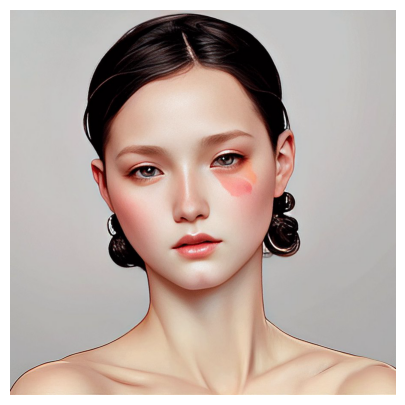

In [10]:
import matplotlib.pyplot as plt
from PIL import Image

IMG_PATH = './examples/source_image/art_2.png'

plt.figure(figsize=(7, 5))
plt.axis('off')
plt.imshow(Image.open(IMG_PATH))
plt.show()

## Select the directory of the audio

In [11]:
from IPython.display import Audio

AUDIO_PATH = './examples/driven_audio/chinese_poem2.wav'

Audio(AUDIO_PATH)

## Animation

In [12]:
!python inference.py --driven_audio {AUDIO_PATH} \
           --source_image {IMG_PATH} \
           --result_dir ./results --still --preprocess full --enhancer gfpgan

2023-09-01 23:18:06.302260: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
using safetensor as default
3DMM Extraction for source image
landmark Det:: 100% 1/1 [00:00<00:00,  8.82it/s]
3DMM Extraction In Video:: 100% 1/1 [00:00<00:00, 12.68it/s]
mel:: 100% 240/240 [00:00<00:00, 26570.75it/s]
audio2exp:: 100% 24/24 [00:00<00:00, 222.73it/s]
Face Renderer:: 100% 120/120 [01:03<00:00,  1.88it/s]
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (256, 247) to (256, 256) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
The generated video is named ./results/2023_09_01_23.18.10/art_2##chinese_poem2.mp4
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7

## Show result

In [20]:
from moviepy.editor import VideoFileClip
import glob

video_path = glob.glob("./results/*.mp4")
clip = VideoFileClip(video_path[0]).resize(height=420)
clip.ipython_display()

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


The result file is in /content/SadTalker/results

# Run APP SadTalker with TTS

In [ ]:
%cd /content/SadTalker

!sed -i 's/demo.launch()/demo.launch(share=True)/' app_sadtalker.py
!sed -i 's/model_name = TTS\.list_models()/model_name = TTS().list_models()/' src/utils/text2speech.py

!python app_sadtalker.py